# Pymaceuticals Inc.
---

### Analysis

1. **Data Cleaning:**
   - The removal of duplicate mouse data ensures the integrity of the dataset, avoiding potential biases in analysis.

2. **Summary Statistics:**
   - Summary statistics (mean, median, variance, standard deviation, SEM) for tumor volume provide a comprehensive understanding of the distribution within each drug regimen.

3. **Bar and Pie Charts:**
   - The bar charts effectively visualize the distribution of mice across different drug regimens, providing an overview of the dataset's composition.
   - Pie charts illustrate the distribution of mice by sex, allowing for a quick assessment of gender representation.

4. **Line and Scatter Plots:**
   - The line plot for a single mouse treated with Capomulin visualizes how the tumor volume changes over time, providing insights into treatment effectiveness.
   - The scatter plot of mouse weight vs. average observed tumor volume for the entire Capomulin regimen identifies potential trends or correlations between these two variables.

5. **Correlation and Regression:**
   - The calculation of the correlation coefficient between mouse weight and average observed tumor volume provides insights into the strength and direction of the relationship.
   - The scatter plot with a line of best fit further illustrates the linear relationship between mouse weight and tumor volume.
 

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from matplotlib import pyplot
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv("Mouse_metadata.csv")
study_results = pd.read_csv("Study_results.csv")

# Combine the data into a single DataFrame
data = pd.merge(study_results, mouse_metadata, how= 'inner', on="Mouse ID")

# Display the data table for preview
data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [15]:
data = data.rename(columns={'Mouse ID': 'mouse_id'})
data = data.rename(columns={'Tumor Volume (mm3)': 'tumor_volume'})
data = data.rename(columns={'Drug Regimen': 'drug_regimen'})
data = data.rename(columns={'Weight (g)': 'weight'})
data.head()

,mouse_id,Timepoint,tumor_volume,Metastatic Sites,drug_regimen,Sex,Age_months,weight
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [16]:
# Checking the number of mice.
data.mouse_id.nunique()

249

In [17]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
data.mouse_id.duplicated().sum()

1644

In [18]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = data[data.mouse_id.duplicated(keep=False)]
duplicates_data = pd.DataFrame(duplicates)
duplicates_data

,mouse_id,Timepoint,tumor_volume,Metastatic Sites,drug_regimen,Sex,Age_months,weight
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [19]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data.drop_duplicates(inplace=True)
data

,mouse_id,Timepoint,tumor_volume,Metastatic Sites,drug_regimen,Sex,Age_months,weight
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [20]:
# Checking the number of mice in the clean DataFrame.
data.mouse_id.nunique()

249

## Summary Statistics

In [21]:
data.head()

,mouse_id,Timepoint,tumor_volume,Metastatic Sites,drug_regimen,Sex,Age_months,weight
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

summary_stats = data.tumor_volume.groupby(data.drug_regimen).mean()

# Assemble the resulting series into a single summary DataFrame.
summary_stats_data = pd.DataFrame(summary_stats)

summary_stats_data['tumor_volume_median'] = data.tumor_volume.groupby(data.drug_regimen).median()
summary_stats_data['tumor_volume_var'] = data.tumor_volume.groupby(data.drug_regimen).var()
summary_stats_data['tumor_volume_std'] = data.tumor_volume.groupby(data.drug_regimen).std()
summary_stats_data['tumor_volume_sem'] = data.tumor_volume.groupby(data.drug_regimen).sem()

summary_stats_data = summary_stats_data.rename(columns={'tumor_volume': 'tumor_volume_mean'})

summary_stats_data

,tumor_volume_mean,tumor_volume_median,tumor_volume_var,tumor_volume_std,tumor_volume_sem
drug_regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [23]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_stats = data.tumor_volume.groupby(data.drug_regimen).agg(['mean','median','var','std','sem'])
agg_summary_stats

,mean,median,var,std,sem
drug_regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [24]:
bar_chart = data.mouse_id.groupby(data.drug_regimen).count()

bar_chart_index = pd.DataFrame(bar_chart)
bar_chart_data = bar_chart_index.reset_index() 

bar_chart_data

,drug_regimen,mouse_id
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,160
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


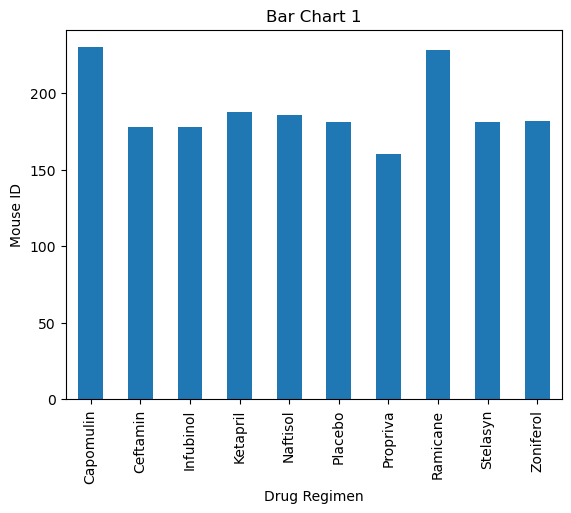

In [26]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_chart_data.plot(x='drug_regimen', y='mouse_id', kind='bar', legend=False)
plt.title('Bar Chart 1')
plt.xlabel('Drug Regimen')
plt.ylabel('Mouse ID')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

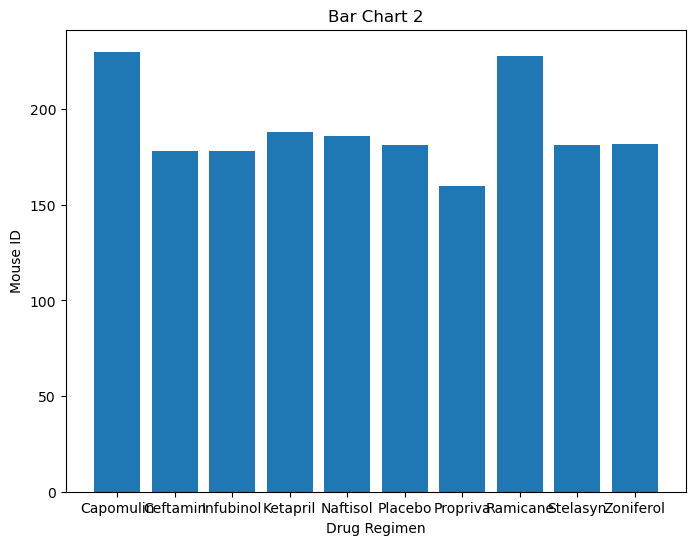

In [27]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
fig,ax=pyplot.subplots(figsize = (8,6))
pyplot.bar(bar_chart_data['drug_regimen'], bar_chart_data['mouse_id'])

# Add labels and title
plt.title('Bar Chart 2')
plt.xlabel('Drug Regimen')
plt.ylabel('Mouse ID')

# Display the chart
pyplot.show

In [28]:
pie_chart = data.mouse_id.groupby(data.Sex).count()

pie_chart_index = pd.DataFrame(pie_chart)
pie_chart_data = pie_chart_index.reset_index() 

pie_chart_data

,Sex,mouse_id
0,Female,934
1,Male,958


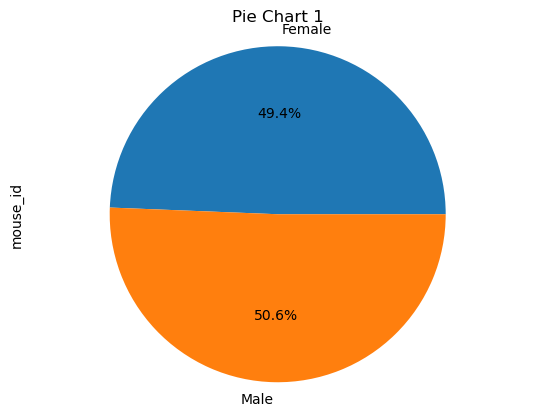

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_chart_data.plot.pie(y='mouse_id', labels=pie_chart_data['Sex'], autopct='%1.1f%%', startangle=0, legend=False)
plt.title('Pie Chart 1')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the chart
plt.show()

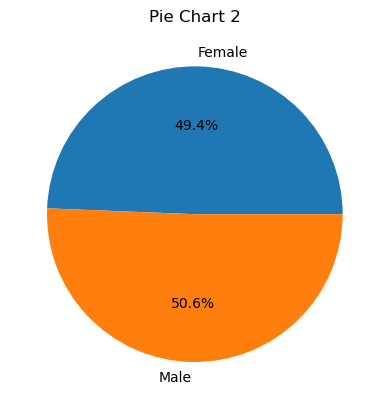

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pie_chart_data['mouse_id'], labels=pie_chart_data['Sex'], autopct='%1.1f%%', startangle=0)

# Add a title
plt.title('Pie Chart 2')

# Display the chart
plt.show()

## Quartiles, Outliers and Boxplots

In [31]:
data.head()

,mouse_id,Timepoint,tumor_volume,Metastatic Sites,drug_regimen,Sex,Age_months,weight
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [32]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_time = data.Timepoint.groupby(data.drug_regimen).max()
max_timepoint = max_time.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
updated_data = pd.merge(data, max_timepoint, on='drug_regimen')
updated_data.head()

,mouse_id,Timepoint_x,tumor_volume,Metastatic Sites,drug_regimen,Sex,Age_months,weight,Timepoint_y
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45


In [33]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = updated_data['drug_regimen'].tolist()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Q1 = data.tumor_volume.quantile(0.25)
Q3 = data.tumor_volume.quantile(0.75)

IQR = Q3 - Q1
Factor = 1.5
BI = IQR * Factor

# Determine outliers using upper and lower bounds
for item in data.tumor_volume:
    if item < (Q1 - BI) or item > (Q3 + BI):
        tumor_vol_data.append(item)

In [34]:
tumor_vol_data

[74.10408567,
 74.10609077,
 75.2949359,
 73.86784476,
 73.69349382,
 76.66881742,
 74.99776443,
 75.11328801,
 73.715619,
 78.56701362,
 73.90139912,
 26.54699343,
 24.36550471,
 22.05012627,
 74.04039018,
 75.12368955,
 73.32443228,
 25.47214326,
 23.34359787]

In [35]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

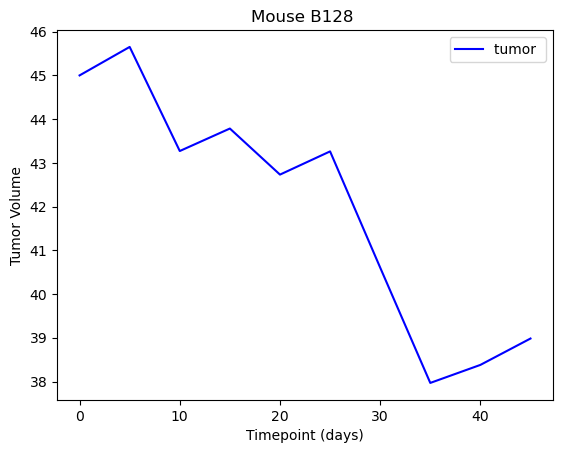

In [36]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Extract a single mouse by label 
mouse = data.loc[data['mouse_id'] == 'b128']

# Save the extracted records as a dataframe
mouse_df = pd.DataFrame(mouse)

# Generate a line plot
mouse_df.plot(x='Timepoint', y='tumor_volume', linestyle='-', color='blue', label='tumor ')

# Add labels and title
plt.title('Mouse B128 ')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume')

# Display the plot
plt.show()

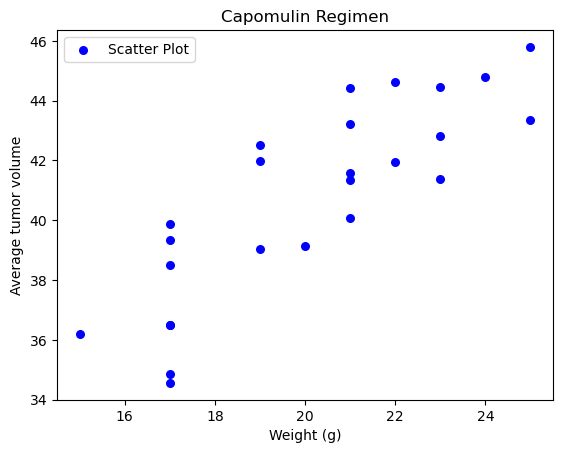

In [37]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Extract a single drug by label 
Capomulin = data.loc[data['drug_regimen'] == 'Capomulin']

# Save the extracted records as a dataframe
Capomulin_data = pd.DataFrame(Capomulin)

Avg_tumor = Capomulin_data.tumor_volume.groupby(Capomulin_data.mouse_id).mean()
Weight_g = Capomulin_data.weight.groupby(Capomulin_data.mouse_id).mean()

Avg_tumor_data = pd.DataFrame(Avg_tumor)
Avg_tumor_df = Avg_tumor_data.reset_index()

Weight_g_data = pd.DataFrame(Weight_g)
Weight_g_df = Weight_g_data.reset_index()

Capomulin_df = pd.merge(Avg_tumor_df, Weight_g_df, how= 'inner', on='mouse_id')

# Generate a scatter plot
Capomulin_df.plot(x='weight', y='tumor_volume', kind='scatter', color='blue', s=30, label='Scatter Plot')

# Add labels and title
plt.title('Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average tumor volume')

# Display the plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume: 0.8419363424694721


<function matplotlib.pyplot.show(close=None, block=None)>

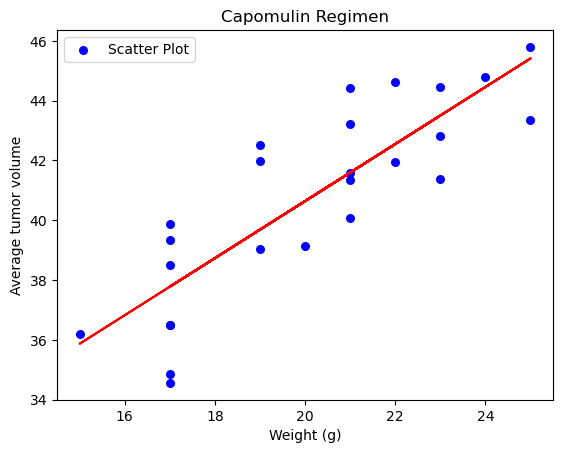

In [38]:
# Calculate the correlation coefficient and a linear regression modelfor mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient
correlation_coefficient = Capomulin_df['weight'].corr(Capomulin_df['tumor_volume'])
print ('The correlation between mouse weight and the average tumor volume:',correlation_coefficient)


# Generate a scatter plot
Capomulin_df.plot(x='weight', y='tumor_volume', kind='scatter', color='blue', s=30, label='Scatter Plot')

# Add labels and title
plt.title('Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average tumor volume')

# Calculate and add line of best fit
m, b = np.polyfit(Capomulin_df['weight'], Capomulin_df['tumor_volume'], deg=1)
plt.plot(Capomulin_df['weight'], m * Capomulin_df['weight'] + b, color='red')

plt.show

In [39]:
data.head()

,mouse_id,Timepoint,tumor_volume,Metastatic Sites,drug_regimen,Sex,Age_months,weight
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [41]:
analysis_1 = data.tumor_volume.groupby(data.drug_regimen).max()
analysis_1 

drug_regimen
Capomulin    48.158209
Ceftamin     68.923185
Infubinol    72.226731
Ketapril     78.567014
Naftisol     76.668817
Placebo      73.212939
Propriva     72.455421
Ramicane     47.622816
Stelasyn     75.123690
Zoniferol    73.324432
Name: tumor_volume, dtype: float64

In [ ]:
Capomulin = data.loc[data['drug_regimen'] == 'Capomulin']